# Merge data sets

In [ ]:
# Data Analysis and Statistical Modeling for Bakery Sales Prediction
# ---------------------------------------------------------------
# This script imports necessary libraries and loads data for analyzing 
# the relationship between weather conditions and bakery sales.

# Import der Umsatz- und der Wetter-Daten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Note: Required for regression analysis, time series analysis, etc.
import statsmodels.api as sm

weather = "/workspaces/bakery_prediction/0_DataPreparation/wetter.csv"
weather = pd.read_csv(weather)
print(weather)

test = "/workspaces/bakery_prediction/0_DataPreparation/test.csv"
test = pd.read_csv(test)
print(test)

train = "/workspaces/bakery_prediction/0_DataPreparation/train.csv"
train = pd.read_csv(train)
print(train)

           Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0     2012-01-01         8.0      9.8250                   14        58.0
1     2012-01-02         7.0      7.4375                   12         NaN
2     2012-01-03         8.0      5.5375                   18        63.0
3     2012-01-04         4.0      5.6875                   19        80.0
4     2012-01-05         6.0      5.3000                   23        80.0
...          ...         ...         ...                  ...         ...
2596  2019-07-28         3.0     23.3500                   14         5.0
2597  2019-07-29         6.0     25.2500                    7        61.0
2598  2019-07-30         7.0     20.7375                    8        61.0
2599  2019-07-31         6.0     20.4500                    7        61.0
2600  2019-08-01         5.0     21.0625                    9        61.0

[2601 rows x 5 columns]
           id       Datum  Warengruppe
0     1808011  2018-08-01            1
1     180

In [ ]:
# merging data from different sources
result = pd.merge(test, train, how='outer')
result = pd.merge(result, weather, how='outer')
print(result)
result = result.drop(columns=["carat", "depth", "table"])


              id       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0            NaN  2012-01-01          NaN     NaN         8.0      9.8250   
1            NaN  2012-01-02          NaN     NaN         7.0      7.4375   
2            NaN  2012-01-03          NaN     NaN         8.0      5.5375   
3            NaN  2012-01-04          NaN     NaN         4.0      5.6875   
4            NaN  2012-01-05          NaN     NaN         6.0      5.3000   
...          ...         ...          ...     ...         ...         ...   
11602  1907303.0  2019-07-30          3.0     NaN         7.0     20.7375   
11603  1907304.0  2019-07-30          4.0     NaN         7.0     20.7375   
11604  1907305.0  2019-07-30          5.0     NaN         7.0     20.7375   
11605        NaN  2019-07-31          NaN     NaN         6.0     20.4500   
11606        NaN  2019-08-01          NaN     NaN         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  
0                     14.0        

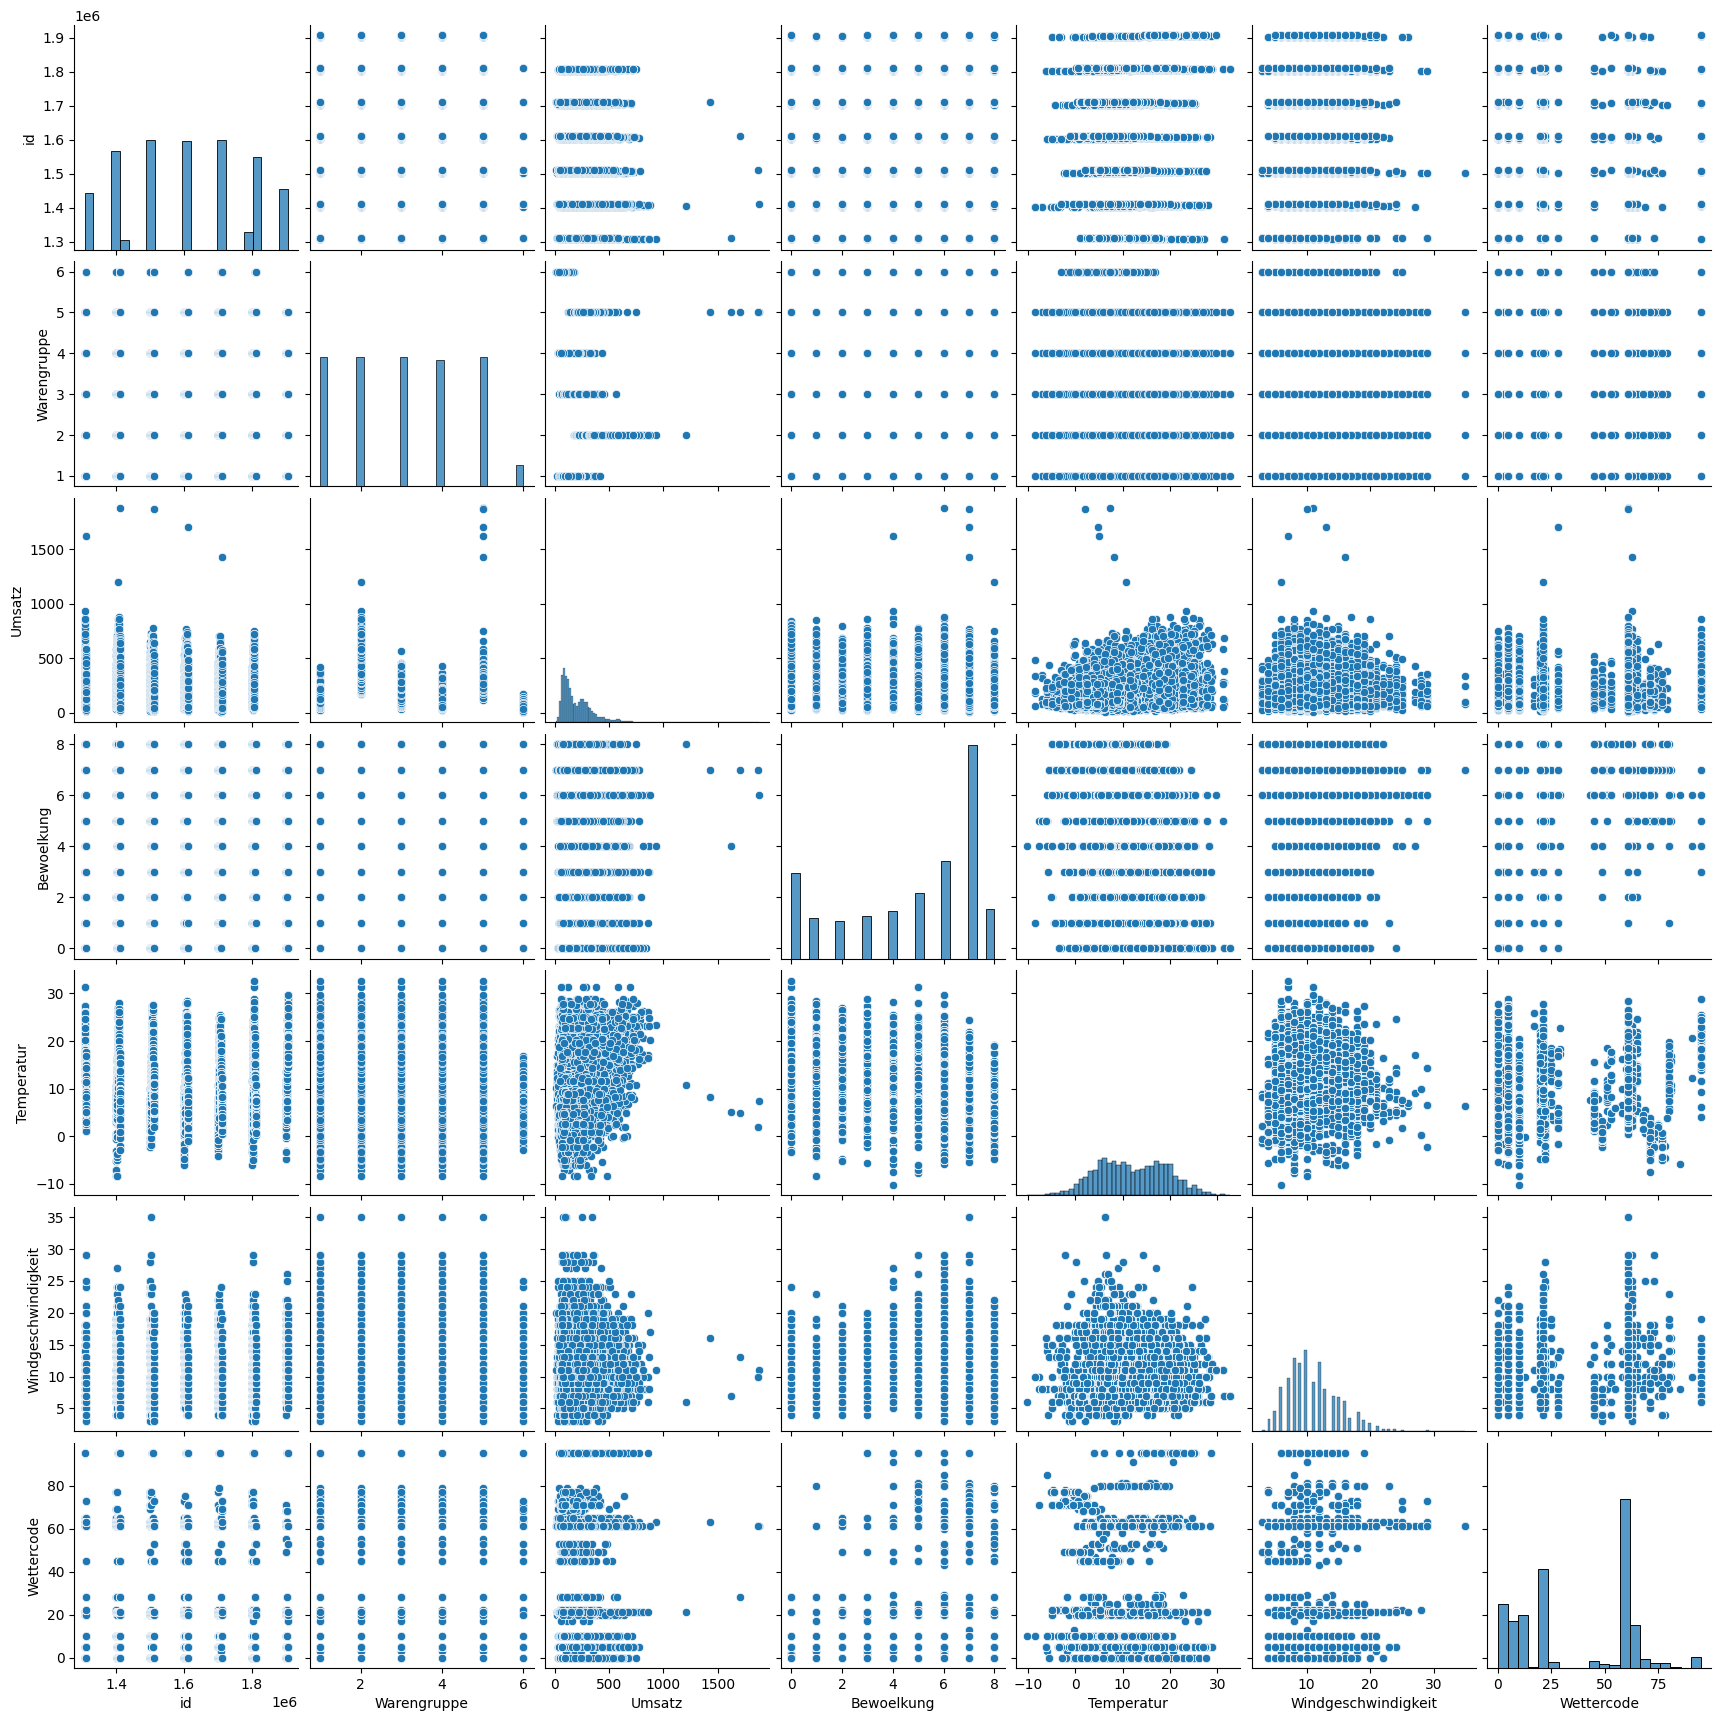

In [15]:
columns = ["id","Datum","Warengruppe","Umsatz","Bewoelkung","Temperatur","Windgeschwindigkeit","Wettercode"]
sns.pairplot(result[columns])

In [13]:
# define date thresholds
train_begin_date = "2013-07-01"
train_end_date = "2017-07-31"

validation_begin_date ="2017-08-01"
validation_end_date ="2018-07-31"

test_begin_date = "2018-08-01"
test_end_date = "2019-07-31"


In [ ]:
train_data = result[(result["Datum"] >= train_begin_date) & (result["Datum"] <= train_end_date)]
train_data.isna().sum()


id                       30
Datum                     0
Warengruppe              30
Umsatz                   30
Bewoelkung                6
Temperatur                6
Windgeschwindigkeit       6
Wettercode             2100
dtype: int64

In [39]:
train_data_short = train_data.drop(columns=["id","Wettercode"]) 
train_data_short = train_data_short.dropna()   

In [40]:
X = sm.add_constant(train_data_short["Temperatur"])
Y = train_data_short["Umsatz"]
train_data_short[train_data_short.isna().any(axis=1)]
#Y.isna().sum()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit


In [42]:
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     368.3
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           3.55e-80
Time:                        17:45:05   Log-Likelihood:                -47846.
No. Observations:                7487   AIC:                         9.570e+04
Df Residuals:                    7485   BIC:                         9.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.3306      3.316     46.537      0.0